In [19]:
import pandas as pd
%matplotlib inline

In [20]:
# 载入sklearn包自带数据集
from sklearn.datasets import load_iris
iris = load_iris()
# 需要聚类的数据150个样本，4个变量
iris.data 
data = pd.DataFrame(iris.data)
print data.head()

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [21]:
# 数据标准化(z-score)
data_zs = (data -data.mean())/data.std()
print data.std()
print data_zs.head()

0    0.828066
1    0.433594
2    1.764420
3    0.763161
dtype: float64
          0         1         2         3
0 -0.897674  1.028611 -1.336794 -1.308593
1 -1.139200 -0.124540 -1.336794 -1.308593
2 -1.380727  0.336720 -1.393470 -1.308593
3 -1.501490  0.106090 -1.280118 -1.308593
4 -1.018437  1.259242 -1.336794 -1.308593


In [22]:
#导入sklearn中的kmean
from sklearn.cluster import KMeans
# 设置类数k
k = 3
# 设置最大迭代次数
iter = 500
# 创建kmeans对象
KNNModel = KMeans(n_clusters=k,n_jobs=4,max_iter=iter)
print KNNModel

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=3, n_init=10,
    n_jobs=4, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [23]:
# 使用数据训练训练model
KNNModel.fit(data_zs)

KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=3, n_init=10,
    n_jobs=4, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
# 每个类别样本个数
print pd.Series(KNNModel.labels_).value_counts()

# 每个类别的聚类中心 
print pd.DataFrame(KNNModel.cluster_centers_)

2    53
0    50
1    47
dtype: int64
          0         1         2         3
0 -1.011191  0.839494 -1.300521 -1.250938
1  1.132177  0.096276  0.992945  1.013776
2 -0.050052 -0.877353  0.346371  0.281121


In [25]:
#用TSNE（高维数据可视化工具）对聚类结果进行可视化
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
 
tsne = TSNE(learning_rate=100)
print tsne

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=100,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=None, verbose=0)


In [32]:
# 对数据进行降维
tsne.fit_transform(data_zs)
data =pd.DataFrame(tsne.embedding_, index=data_zs.index)
print data.head()

ValueError: array must not contain infs or NaNs

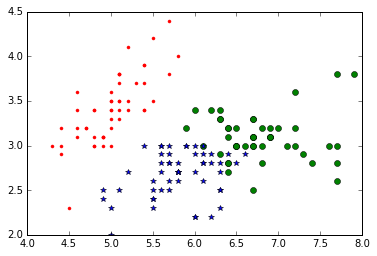

In [29]:
# 不同类别用不同颜色和样式绘图
d = data[KNNModel.labels_==0]
plt.plot(d[0],d[1],'r.')
d = data[KNNModel.labels_==1]
plt.plot(d[0],d[1],'go')
d = data[KNNModel.labels_==2]
plt.plot(d[0],d[1],'b*')
plt.show()

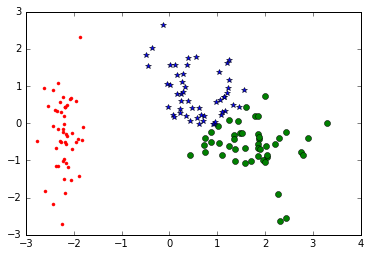

In [31]:
#下面我们用PCA降维后，对聚类结果进行可视化
from sklearn.decomposition import PCA
pca = PCA()
data =pca.fit_transform(data_zs)
data = pd.DataFrame(data,index=data_zs.index)
d = data[KNNModel.labels_==0]
plt.plot(d[0],d[1],'r.')
d = data[KNNModel.labels_==1]
plt.plot(d[0],d[1],'go')
d = data[KNNModel.labels_==2]
plt.plot(d[0],d[1],'b*')
plt.show()